# Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_privacy
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy



from Funciones_TesisV1 import LSTM_CON_PD
from Funciones_TesisV1 import LSTM_SIN_DP

# Abrir archivos

In [97]:
#df = pd.read_csv("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Descarga Datos K\\Hourly Energy Consumption\\archiv\\AEP_hourly.csv")

df = pd.read_csv("Descarga Datos K\\Time series Practice Dataset\\tspd\\train.csv")

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df[(df['product']==1) & (df['store'] ==0)]
df.sort_values(by='Date',inplace = True)
df.reset_index(drop=True, inplace=True)
df

,Date,store,product,number_sold
0,2010-01-01,0,1,851
1,2010-01-02,0,1,843
2,2010-01-03,0,1,847
3,2010-01-04,0,1,855
4,2010-01-05,0,1,866
...,...,...,...,...
3282,2018-12-27,0,1,708
3283,2018-12-28,0,1,702
3284,2018-12-29,0,1,698
3285,2018-12-30,0,1,700


## Graficar datos

<function matplotlib.pyplot.show(close=None, block=None)>

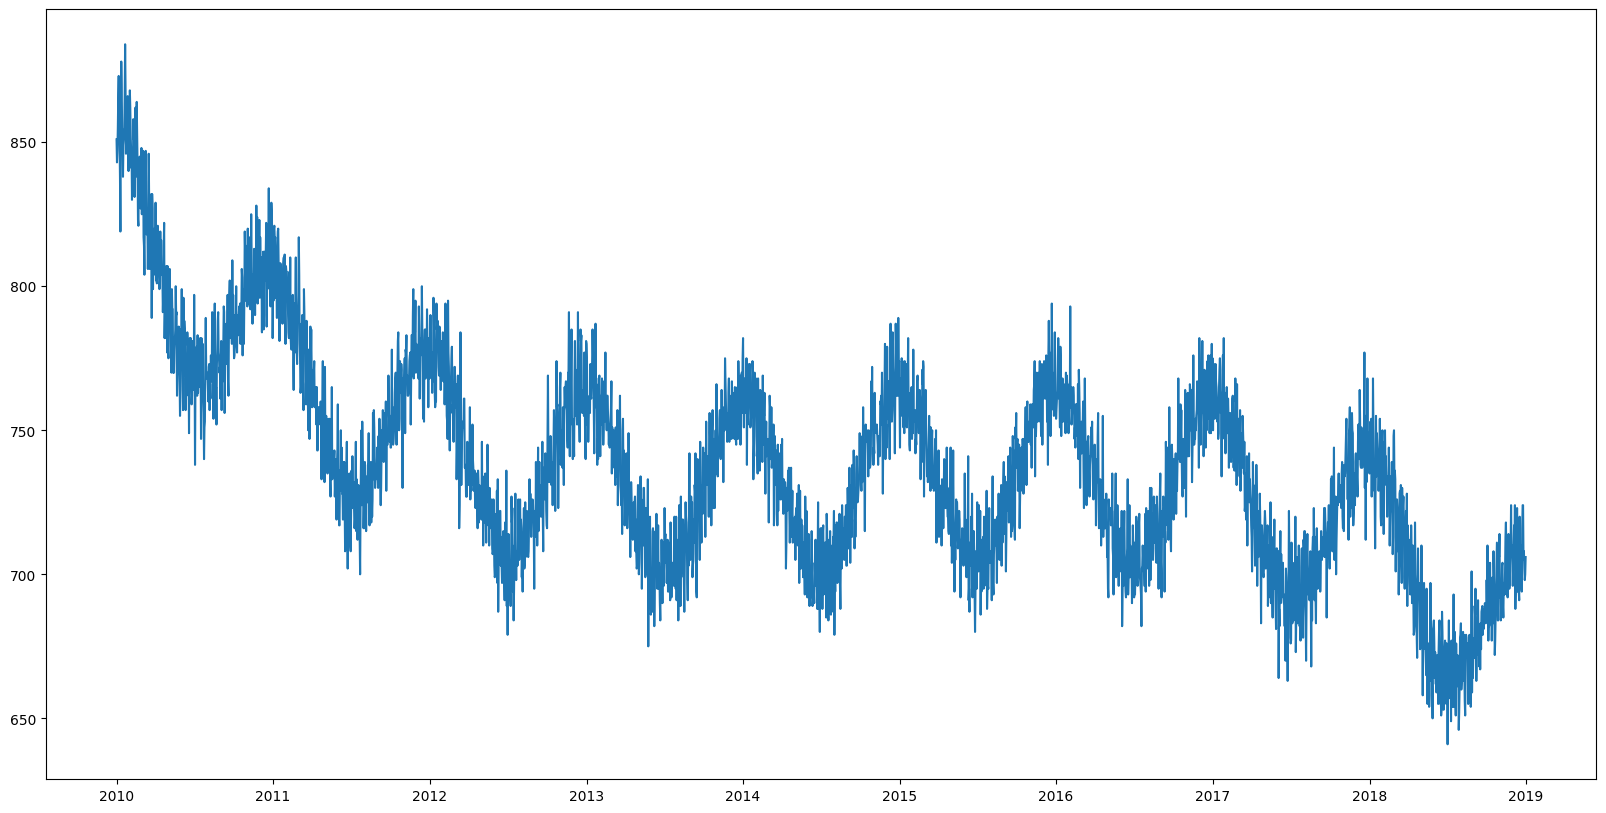

In [98]:

plt.figure(figsize=(20,10))
plt.plot(df['Date'][:], df['number_sold'][:])
plt.show

## Seleccionar datos para modelo

<function matplotlib.pyplot.show(close=None, block=None)>

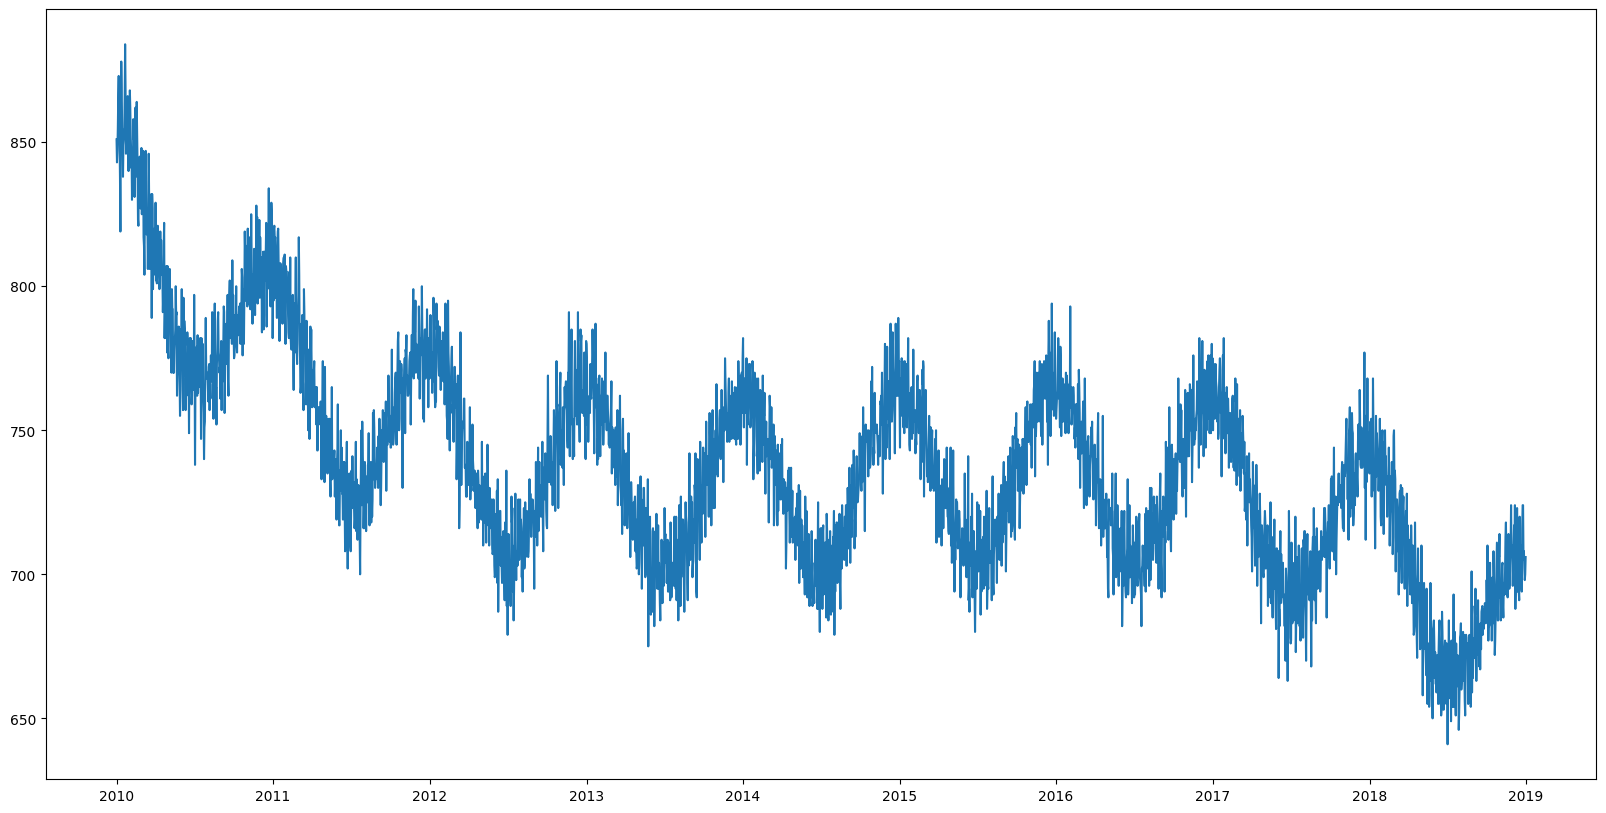

In [107]:
dfModelo = df.iloc[:,:]

plt.figure(figsize=(20,10))
plt.plot(dfModelo['Date'][:], dfModelo['number_sold'][:])
plt.show

In [138]:
datos = dfModelo['number_sold'].to_numpy()
fechas = dfModelo['Date'].to_numpy()
datos = datos.reshape(-1,1)
datos = datos[:-100]

len(datos)

3187

In [139]:
estandarizacion = MinMaxScaler().fit(datos)
scaled_data = estandarizacion.transform(datos)

window_size = 168
t_pridiccion = 24


# dividir en train, test
X, y = [], []
Xf,yf = [],[]

for i in range(len(scaled_data) - window_size - t_pridiccion):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size:i+window_size+t_pridiccion])

    Xf.append(fechas[i:i+window_size])
    yf.append(fechas[i+window_size:i+window_size+t_pridiccion])

X, y = np.array(X), np.array(y)
Xf,yf = np.array(Xf),np.array(yf)




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [141]:
batch  =44
len(X_train)*0.8/batch

49.0

In [140]:
len(X_train)*0.8

2156.0

In [7]:
# len(X_train)*0.8/batch

In [153]:
# Parámetros

nodos1 = 50
nodos2 =50
lr = 0.0001
paciencia = 15
epocas = 80
window_size = 168
t_pridiccion = 24

l2_norm_clip = 1
noise_multiplier = 1
num_microbatches = 4
learning_rate = 0.0001





In [156]:
historySPD, y_hatSPD,y_test1SPD,fecha_y_testSPD, MAES_SPD,RMSE_SPD,ER_Medianos_SPD,ER_Medios_SPD = LSTM_SIN_DP(datos,fechas,nodos1,nodos2,paciencia,epocas,batch,window_size,t_pridiccion,learning_rate)

Epoch 1/80
49/49 [==============================] - 4s 48ms/step - loss: 0.0954 - val_loss: 0.0107
Epoch 2/80
49/49 [==============================] - 2s 36ms/step - loss: 0.0113 - val_loss: 0.0055
Epoch 3/80
49/49 [==============================] - 2s 39ms/step - loss: 0.0063 - val_loss: 0.0045
Epoch 4/80
49/49 [==============================] - 2s 38ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 5/80
49/49 [==============================] - 2s 38ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 6/80
49/49 [==============================] - 2s 38ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 7/80
49/49 [==============================] - 2s 41ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 8/80
49/49 [==============================] - 2s 39ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 9/80
49/49 [==============================] - 2s 40ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 10/80
49/49 [==============================] - 2s 40ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 11/

In [155]:
historyCPD, y_hatCPD,y_test1CPD,fecha_y_testCPD, MAES_CPD,RMSE_CPD,ER_Medianos_CPD,ER_Medios_CPD = LSTM_CON_PD(datos,fechas,nodos1,nodos2,paciencia,epocas,batch,window_size,t_pridiccion,l2_norm_clip,noise_multiplier,num_microbatches,learning_rate)

Epoch 1/80
49/49 [==============================] - 10s 78ms/step - loss: 0.1949 - val_loss: 0.1247
Epoch 2/80
49/49 [==============================] - 4s 73ms/step - loss: 0.1945 - val_loss: 0.1244
Epoch 3/80
49/49 [==============================] - 4s 73ms/step - loss: 0.1941 - val_loss: 0.1241
Epoch 4/80
49/49 [==============================] - 4s 77ms/step - loss: 0.1937 - val_loss: 0.1238
Epoch 5/80
49/49 [==============================] - 4s 77ms/step - loss: 0.1933 - val_loss: 0.1234
Epoch 6/80
49/49 [==============================] - 4s 78ms/step - loss: 0.1929 - val_loss: 0.1232
Epoch 7/80
49/49 [==============================] - 4s 81ms/step - loss: 0.1925 - val_loss: 0.1229
Epoch 8/80
49/49 [==============================] - 4s 82ms/step - loss: 0.1922 - val_loss: 0.1227
Epoch 9/80
49/49 [==============================] - 4s 81ms/step - loss: 0.1919 - val_loss: 0.1225
Epoch 10/80
49/49 [==============================] - 4s 80ms/step - loss: 0.1916 - val_loss: 0.1222
Epoch 11

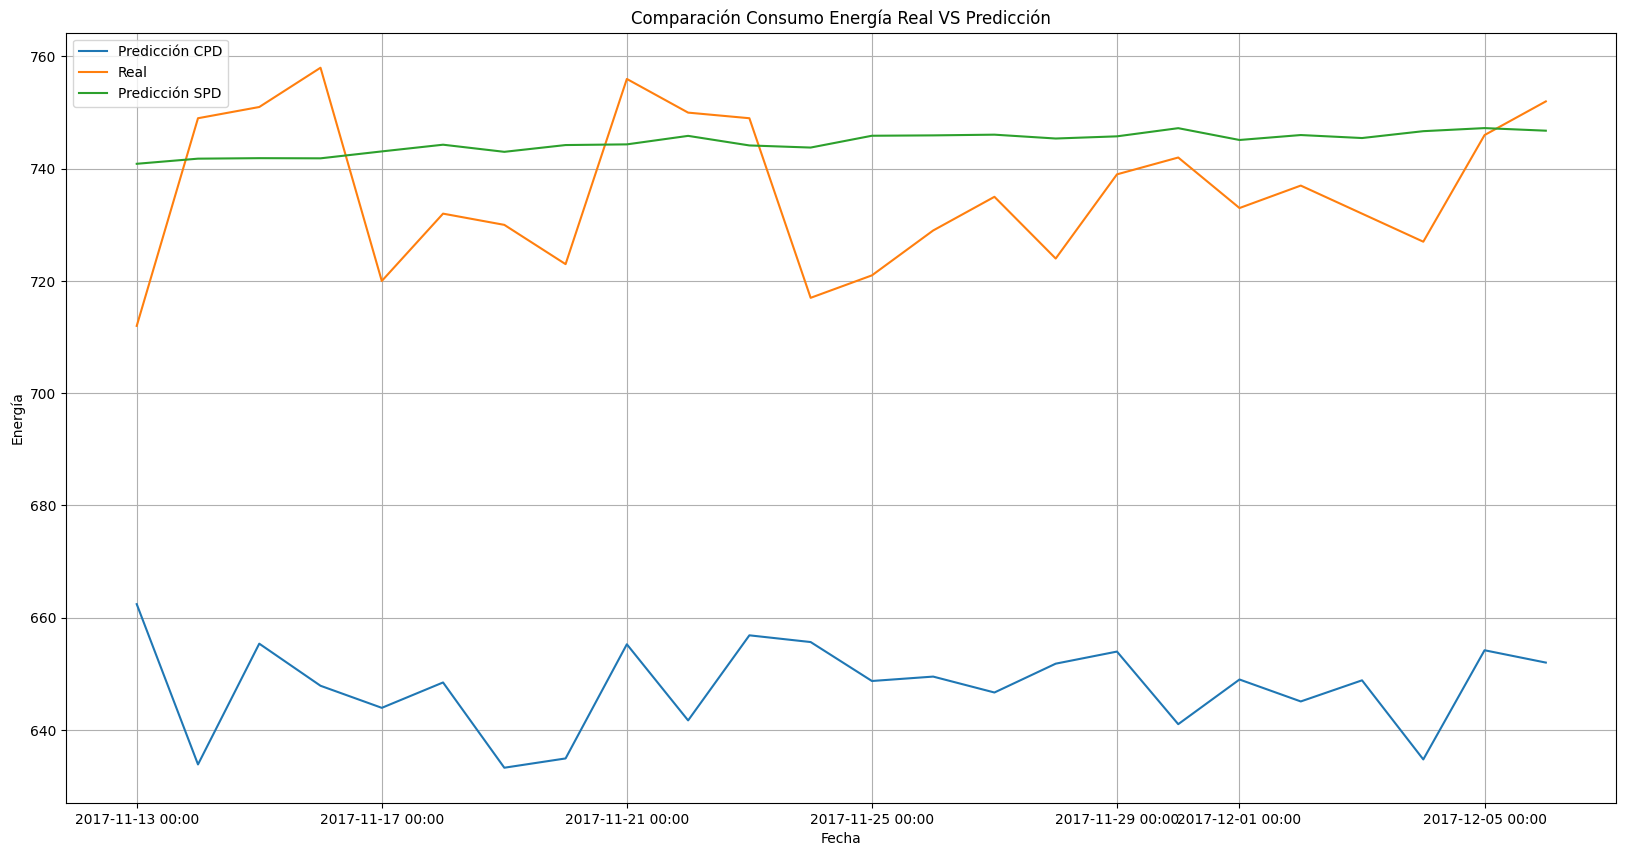

In [157]:

num = 10
plt.figure(figsize=(20,10))
plt.title("Comparación Consumo Energía Real VS Predicción")
plt.plot(fecha_y_testCPD[num],y_hatCPD[num],label = "Predicción CPD")
plt.plot(fecha_y_testCPD[num],y_test1CPD[num],label = "Real")
plt.plot(fecha_y_testCPD[num],y_hatSPD[num],label = "Predicción SPD")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())



plt.ylabel("Energía")
plt.xlabel("Fecha")
plt.grid()
plt.legend()
plt.show()

In [159]:
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy_statement

# Parámetros correctos para la función
epsilon = compute_dp_sgd_privacy_statement(
    number_of_examples = 2695, # Aquí usamos 'num_examples' en lugar de 'n'
    batch_size=batch,
    noise_multiplier=noise_multiplier,
    delta=1e-5,
    num_epochs = epocas
)

print(f"Epsilon: {epsilon}")


Epsilon: DP-SGD performed over 2695 examples with 44 examples per iteration, noise
multiplier 1 for 80 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:       244.036
    Epsilon assuming Poisson sampling (*):                     52.333

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed that the actual epsilon
should be closer to this value than the conservative assumption of an arbitrary
data order.



In [158]:
X_train.shape

(2695, 168, 1)

In [ ]:
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy_statement

# Parámetros correctos para la función
epsilon = compute_dp_sgd_privacy_statement(
    number_of_examples = X_train.shape[0], # Aquí usamos 'num_examples' en lugar de 'n'
    batch_size=batch,
    noise_multiplier=noise_multiplier,
    delta=1e-5,
    num_epochs = epocas
)

print(f"Epsilon: {epsilon}")


In [19]:
MAES_CPD

{0: 3774.85,
 1: 6743.69,
 2: 5417.11,
 3: 3786.67,
 4: 3346.06,
 5: 3245.05,
 6: 4250.72,
 7: 4659.03,
 8: 4672.65,
 9: 4027.04,
 10: 4482.43,
 11: 5340.74,
 12: 6372.78,
 13: 6247.83,
 14: 4253.5,
 15: 2892.32,
 16: 4086.19,
 17: 5201.42,
 18: 5185.05,
 19: 5623.16,
 20: 4520.94,
 21: 4634.26,
 22: 5281.56,
 23: 5507.46}

In [20]:
RMSE_CPD

{0: 4071.3611090150184,
 1: 6946.487736259239,
 2: 5667.342443332677,
 3: 4096.963221704584,
 4: 3669.0470452148743,
 5: 3620.328753027824,
 6: 4499.105894508374,
 7: 4982.444196375912,
 8: 4954.5873299398,
 9: 4368.741274097151,
 10: 4807.527031645272,
 11: 5566.177296852841,
 12: 6617.433962647455,
 13: 6506.158128265866,
 14: 4557.948617525213,
 15: 3247.1367156311726,
 16: 4440.000877252165,
 17: 5523.7561414312995,
 18: 5500.7637760587395,
 19: 5907.594463061932,
 20: 4830.568617668111,
 21: 4992.149974710295,
 22: 5628.106587476822,
 23: 5824.6759042885815}

In [21]:
ER_Medianos_CPD

{0: 24.92,
 1: 44.18,
 2: 35.57,
 3: 25.03,
 4: 22.04,
 5: 21.45,
 6: 27.93,
 7: 30.59,
 8: 30.78,
 9: 26.53,
 10: 29.49,
 11: 35.09,
 12: 41.82,
 13: 40.98,
 14: 28.01,
 15: 18.96,
 16: 26.9,
 17: 34.23,
 18: 34.17,
 19: 37.09,
 20: 29.82,
 21: 30.57,
 22: 34.81,
 23: 36.25}

In [22]:
ER_Medios_CPD

{0: 23.86,
 1: 43.45,
 2: 34.71,
 3: 23.96,
 4: 21.09,
 5: 20.41,
 6: 27.05,
 7: 29.75,
 8: 29.83,
 9: 25.56,
 10: 28.57,
 11: 34.24,
 12: 41.07,
 13: 40.25,
 14: 27.08,
 15: 18.21,
 16: 26.02,
 17: 33.42,
 18: 33.33,
 19: 36.25,
 20: 28.96,
 21: 29.72,
 22: 34.03,
 23: 35.55}

In [ ]:
y_hat

# Imprimir todas las predicciones

In [ ]:
fig = plt.figure(figsize=(25, 130))
ax = fig.subplots(14,1)

for i in range(14):
    ax[i].set_title(f'Comparación Consumo Energía Real VS Predicción - {29*i}')
    ax[i].set_xlabel("Fecha")
    ax[i].set_ylabel("Energía")
    ax[i].plot(fecha_y_test[29*(i)],y_hat[29*(i)],label = "Predicción")
    ax[i].plot(fecha_y_test[29*(i)],estandarizacion.inverse_transform(y_test[29*(i)]),label = "Real")
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H'))
    ax[i].xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=15)
    ax[i].legend()
    ax[i].grid()
    
